In [28]:
from IterativeBase_Options import *
import numpy as np 
import pandas as pd 
import math 
import scipy as sp
import sympy as smp
import yfinance as yf
from ib_async import *

In [17]:

from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, .3, .05, 1)

# The estimated price of a contract using the black-Scholes model. 


np.float64(14.231254785985819)

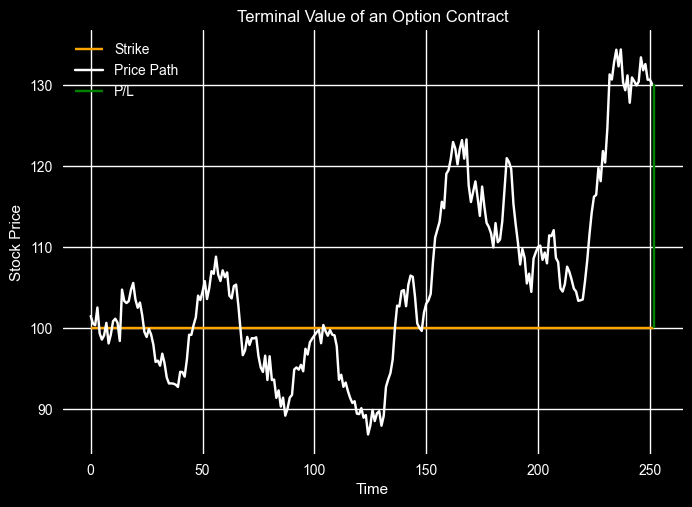

Premium at t=0: 14.231254785985819
P/L: 15.918064816420461


In [19]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", black_scholes_call(100, 100, .3, .05, 1))
print("P/L:", max(path.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, .3, .05, 1))

# (This part of the code is from Roman Paolucci's QFin library documentation.)

In [20]:
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


In [21]:
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

# Using GBM to simulate the underlying price path. It simulates 100,000 paths and calculates the average P/L of the option strategy.


np.float64(91.96712276789468)

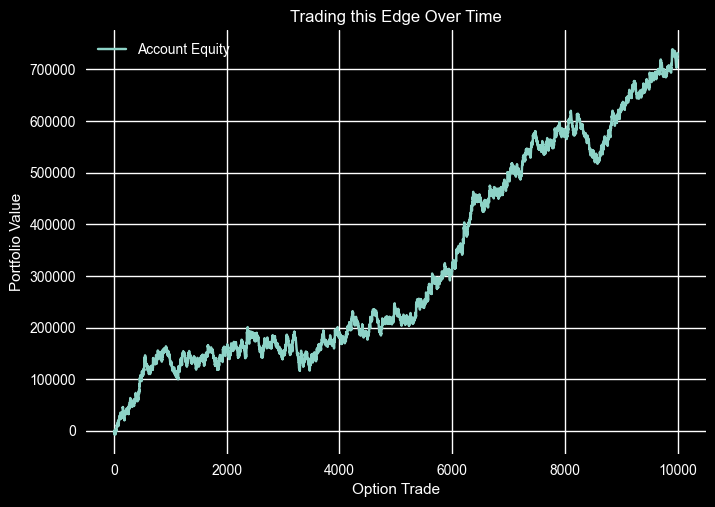

In [22]:
premium = 14.10 * 100
pls = []

for i in range(10000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

In [59]:
# As we saw, this works only in the long-term. Mathmatically, it will approcach positive return over the long run, but you may lose severly in the short term. It makes assumptions, and it must. This is to be carefully considered when trading options using the Black-Scholes model.


In [ ]:
from scipy.stats import norm
import numpy as np

raw = pd.read_csv("aapl_2021_2023.csv")
raw.columns = raw.columns.str.strip()  # Remove leading/trailing spaces
# print(raw.columns.tolist())
raw.columns = raw.columns.str.strip()
raw = raw[['[UNDERLYING_LAST]', '[C_LAST]']]
raw = raw.loc[0:10000]
print(raw)

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C




C:\Users\mihir\AppData\Local\Temp\ipykernel_8112\2839696613.py:5: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("aapl_2021_2023.csv")


       [UNDERLYING_LAST]    [C_LAST]
0                 138.90    0.000000
1                 138.90    0.000000
2                 138.90    0.000000
3                 138.90   53.160000
4                 138.90   47.300000
...                  ...         ...
9996              147.05    1.150000
9997              147.05    0.730000
9998              147.05    0.420000
9999              147.05    0.260000
10000             147.05    0.170000

[10001 rows x 2 columns]


In [130]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load and prepare raw data
raw = pd.read_csv("aapl_2021_2023.csv")
raw.columns = raw.columns.str.strip()  # remove leading/trailing spaces
raw = raw[['[UNDERLYING_LAST]', '[C_LAST]']]
raw = raw.loc[0:10000]

# Ensure numeric types
raw['[UNDERLYING_LAST]'] = pd.to_numeric(raw['[UNDERLYING_LAST]'], errors='coerce')
raw['[C_LAST]'] = pd.to_numeric(raw['[C_LAST]'], errors='coerce')

# Filter rows with meaningful price and underlying change
raw_filtered = raw[(raw['[C_LAST]'] > 0.1)]
raw_filtered = raw_filtered.reset_index(drop=True)

# Black–Scholes function (vectorized)
def black_scholes_call_vectorized(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

# Example constants
K = 150       # Strike
sigma = 0.3   # Implied vol
r = 0.05      # Risk-free rate
t = 30/252    # 30 trading days in years

# Compute theoretical prices
raw_filtered['theo_price'] = black_scholes_call_vectorized(
    raw_filtered['[UNDERLYING_LAST]'], K, sigma, r, t
)

# Optional: difference between market and theoretical
raw_filtered['price_diff'] = raw_filtered['theo_price'] - raw_filtered['[C_LAST]']

# Trade signal: 

# Define a threshold for actionable difference
threshold = 0.1  # adjust as needed

# Add trade signal column using lambda
raw_filtered['trade_signal'] = raw_filtered.apply(
    lambda row: 'BUY' if row['theo_price'] - row['[C_LAST]'] > threshold 
                else ('SELL' if row['[C_LAST]'] - row['theo_price'] > threshold else 'HOLD'),
    axis=1
)

print(raw_filtered[['[UNDERLYING_LAST]', '[C_LAST]', 'theo_price', 'price_diff', 'trade_signal']].head())


C:\Users\mihir\AppData\Local\Temp\ipykernel_8112\1250837386.py:6: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("aapl_2021_2023.csv")


   [UNDERLYING_LAST]  [C_LAST]  theo_price  price_diff trade_signal
0              138.9     53.16    2.180495  -50.979505         SELL
1              138.9     47.30    2.180495  -45.119505         SELL
2              138.9     38.74    2.180495  -36.559505         SELL
3              138.9     36.40    2.180495  -34.219505         SELL
4              138.9     32.05    2.180495  -29.869505         SELL


In [135]:
import pandas as pd
import numpy as np
from scipy.stats import norm

class BlackScholesTrader(IterativeBase):
    def __init__(self, csv_file, strike, sigma, r, t, threshold=0.1):
        """
        csv_file : path to CSV containing '[UNDERLYING_LAST]' and '[C_LAST]'
        strike : strike price (K)
        sigma : implied volatility (annualized)
        r : risk-free rate
        t : time to expiration in years
        threshold : price difference threshold to trigger trade signals
        """
        self.csv_file = csv_file
        self.K = strike
        self.sigma = sigma
        self.r = r
        self.t = t
        self.threshold = threshold
        
        # Load and preprocess CSV
        self.load_data()
    
    def load_data(self):
        raw = pd.read_csv(self.csv_file)
        raw.columns = raw.columns.str.strip()
        raw = raw[['[UNDERLYING_LAST]', '[C_LAST]']]
        raw = raw.loc[0:10000]
        
        # Ensure numeric
        raw['[UNDERLYING_LAST]'] = pd.to_numeric(raw['[UNDERLYING_LAST]'], errors='coerce')
        raw['[C_LAST]'] = pd.to_numeric(raw['[C_LAST]'], errors='coerce')
        
        # Filter non-zero option prices
        self.data = raw[raw['[C_LAST]'] > 0.1].reset_index(drop=True)
    
    def compute_theoretical_prices(self):
        S = self.data['[UNDERLYING_LAST]']
        K, sigma, r, t = self.K, self.sigma, self.r, self.t
        
        d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
        d2 = d1 - sigma * np.sqrt(t)
        self.data['theo_price'] = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
        
        # Price difference
        self.data['price_diff'] = self.data['theo_price'] - self.data['[C_LAST]']
    
    def generate_trade_signals(self):
        # Vectorized trade signal using lambda
        self.data['trade_signal'] = self.data.apply(
            lambda row: '1' if row['price_diff'] > self.threshold 
                        else ('-1' if row['price_diff'] < -self.threshold else '0'),
            axis=1
        )
    
    def run(self):
        self.compute_theoretical_prices()
        self.generate_trade_signals()
        return self.data[['[UNDERLYING_LAST]', '[C_LAST]', 'theo_price', 'price_diff', 'trade_signal']]


In [136]:
trader = BlackScholesTrader(
    csv_file="aapl_2021_2023.csv",
    strike=150,
    sigma=0.3,
    r=0.05,
    t=30/252,
    threshold=0.1
)

df_signals = trader.run()
print(df_signals.head())

C:\Users\mihir\AppData\Local\Temp\ipykernel_8112\2049223072.py:26: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(self.csv_file)


   [UNDERLYING_LAST]  [C_LAST]  theo_price  price_diff trade_signal
0              138.9     53.16    2.180495  -50.979505           -1
1              138.9     47.30    2.180495  -45.119505           -1
2              138.9     38.74    2.180495  -36.559505           -1
3              138.9     36.40    2.180495  -34.219505           -1
4              138.9     32.05    2.180495  -29.869505           -1


In [146]:
class BlackScholesTraderExec(BlackScholesTrader):
    def __init__(self, csv_file, strike, sigma, r, t, threshold=0.1, amount=10000, use_spread=True):
        # Initialize base trading balance etc. via IterativeBase
        super().__init__(csv_file, strike, sigma, r, t, threshold)
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.position = 0
        self.use_spread = use_spread

    def get_values(self, bar):
        """Override IterativeBase.get_values for CSV option data."""
        # Instead of a datetime, just use a string
        date = f"Row {bar}"
        # Use C_LAST as the "price" that buy/sell will operate on
        price = float(self.data['[C_LAST]'].iloc[bar])
        # Spread can be zero for options
        spread = 0.0
        return date, price, spread

    def execute_trades(self, unit_size=1):
        """
        Iterates through the dataset and executes trades based on trade_signal.
        unit_size: number of contracts to buy/sell per signal
        """
        for idx, row in self.data.iterrows():
            S = row['[UNDERLYING_LAST]']
            signal = row['trade_signal']

            if signal == '1':
                # Buy option (use market price)
                self.buy_instrument(bar=idx, units=unit_size, amount=None)
            elif signal == '-1':
                # Sell option (use market price)
                self.sell_instrument(bar=idx, units=unit_size, amount=None)
            # HOLD -> do nothing


In [147]:
trader_exec = BlackScholesTraderExec(
    csv_file="aapl_2021_2023.csv",
    strike=150,
    sigma=0.3,
    r=0.05,
    t=30/252,
    threshold=0.1,
    amount=10000
)

# Compute prices and trade signals
df_signals = trader_exec.run()
print(df_signals.head())

# Execute trades based on signals
trader_exec.execute_trades(unit_size=1)

# Check final balance and NAV
trader_exec.print_current_nav(bar=len(trader_exec.data)-1)
trader_exec.close_pos(bar=len(trader_exec.data)-1)


C:\Users\mihir\AppData\Local\Temp\ipykernel_8112\2049223072.py:26: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(self.csv_file)


   [UNDERLYING_LAST]  [C_LAST]  theo_price  price_diff trade_signal
0              138.9     53.16    2.180495  -50.979505           -1
1              138.9     47.30    2.180495  -45.119505           -1
2              138.9     38.74    2.180495  -36.559505           -1
3              138.9     36.40    2.180495  -34.219505           -1
4              138.9     32.05    2.180495  -29.869505           -1
Row 0 | Selling 1 units for 53.16000
Row 1 | Selling 1 units for 47.30000
Row 2 | Selling 1 units for 38.74000
Row 3 | Selling 1 units for 36.40000
Row 4 | Selling 1 units for 32.05000
Row 5 | Selling 1 units for 30.67000
Row 6 | Selling 1 units for 25.15000
Row 7 | Selling 1 units for 23.30000
Row 8 | Selling 1 units for 22.20000
Row 9 | Selling 1 units for 23.85000
Row 10 | Selling 1 units for 18.00000
Row 11 | Selling 1 units for 17.31000
Row 12 | Selling 1 units for 15.60000
Row 13 | Selling 1 units for 17.15000
Row 14 | Selling 1 units for 12.90000
Row 15 | Selling 1 units for 13.

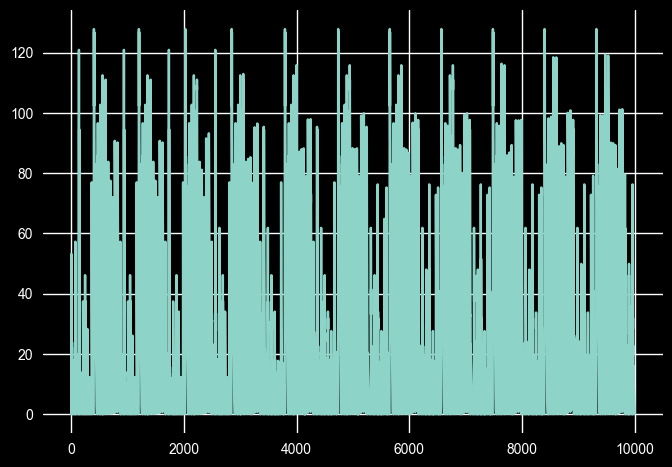

In [140]:
plt.plot(raw["[C_LAST]"])